# Visualisation of Drop-seq

In [1]:
library(dplyr)
library(Seurat)
library(ggplot2)
library(patchwork)
library(tidyverse)
library(Matrix)
library(gghighlight)
library(scales)


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 


Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


 次のパッケージを付け加えます: ‘Matrix’ 


 以下のオブジェクトは ‘package:tidyr’ からマスクされています: 

     expand, pack, unpack 




In [2]:
samplemerged = readRDS("17.3-3.merged.data.mES.rds")

## plots for QC

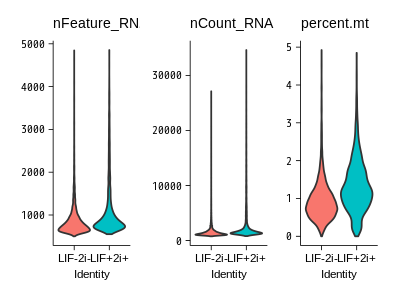

In [3]:
w = 3.3
h = 2.5
FONT.SIZE = 7
LABEL.FONT.SIZE = 7
options(repr.plot.width = w, repr.plot.height = h)
LINE.W = 0.2320667

themeset = theme_classic() +
        theme(
            strip.background = element_blank(),
            strip.text.x = element_blank(),
            #strip.text.y = element_blank(),
            axis.text.x = element_text(colour = "black", size = LABEL.FONT.SIZE),
            axis.text.y = element_text(colour = "black", size = LABEL.FONT.SIZE),
            axis.title = element_text(size = FONT.SIZE),
            axis.line = element_line(size = LINE.W, colour = "black"),
            axis.ticks = element_line(size = LINE.W, colour = "black"),
            text = element_text(size = FONT.SIZE),
            legend.position="none"
        ) 

theme_set(themeset)
Idents(samplemerged) <- "sampletype"
p1 <- VlnPlot(samplemerged, features = c("nFeature_RNA" , "nCount_RNA","percent.mt"),pt.size=0,group.by = 'sampletype')*themeset

ggsave(file = "QCviolin.pdf", plot = p1, width = w, height = h)
p1

## UMAP

In [4]:
FONT.SIZE = 7
LABEL.FONT.SIZE = 7
LINE.W <- 0.2320667

set.theme = theme(
            strip.background = element_blank(),
            strip.text.x = element_blank(),
            strip.text.y = element_blank(),
            axis.text.x = element_text(colour = "black", angle = 0, hjust = 0.6, vjust = 0.7, size = LABEL.FONT.SIZE),
            axis.text.y = element_text(colour = "black", size = LABEL.FONT.SIZE),
            axis.title = element_text(size = FONT.SIZE),
            axis.line = element_line(size = LINE.W, colour = "black"),
            axis.ticks = element_line(size = LINE.W, colour = "black"),
            panel.background = element_blank(),
            plot.background = element_blank(),
            plot.title = element_blank()
        ) 

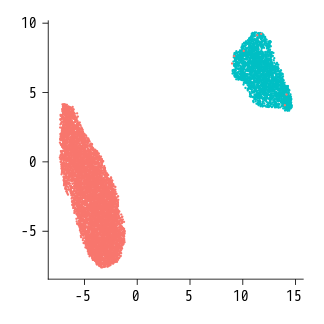

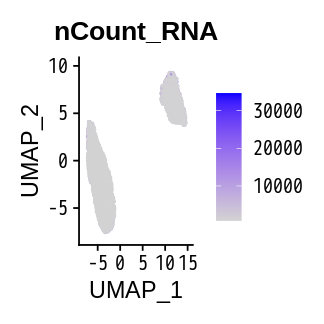

In [19]:
#plot UMAP
w = 2.7
h = 2.7

options(repr.plot.width=w, repr.plot.height=h)

dimplotumap <- DimPlot(samplemerged, reduction = "umap", pt.size = 0.0015)+
  theme(legend.position = "none")+ set.theme
dimplotumapsample <- DimPlot(samplemerged,reduction = "umap",pt.size = 0.0005,group.by = 'sampletype')+
set.theme + theme(plot.title = element_blank(),legend.position="none")
featureRNAcountumap <- FeaturePlot(object = samplemerged, reduction = "umap", features = "nCount_RNA")

ggsave(file = "dimplotumap.pdf", plot = dimplotumap, dpi = 500, width = w, height = h)
ggsave(file = "dimplotumapsample.pdf", plot = dimplotumapsample, dpi = 500, width = w, height = h)
ggsave(file = "featureRNAcountumap.pdf", plot = featureRNAcountumap, dpi = 500, width = 8, height = 5)

dimplotumapsample
featureRNAcountumap

# find markers for every cluster compared to all remaining cells 
samplemerged.markers <- FindAllMarkers(samplemerged, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

top10 <- samplemerged.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

In [7]:
Idents(samplemerged) <- "sampletype"

samplemerged.markers <- FindAllMarkers(samplemerged, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

top10 <- samplemerged.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

Calculating cluster LIF+2i+

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster LIF-2i-



Warning message in DoHeatmap(samplemerged, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: mm10-Pkm, mm10-Eno1, mm10-Mif”


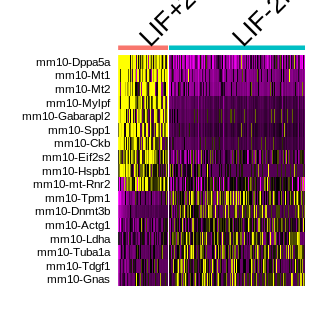

In [8]:
# find markers for every cluster compared to all remaining cells

w = 3
h = 2.7

heatmapcluster <- DoHeatmap(samplemerged, features = top10$gene) +
  theme(
    axis.title = element_text(size = FONT.SIZE),
    axis.text = element_text(colour = "black", size = FONT.SIZE),
    legend.position="none", 
    axis.text.y=element_text(size = 7, family="Helvetica"))

ggsave(file = "heatmapcluster.pdf", plot = heatmapcluster, width = w, height = h)

heatmapcluster

## violin plot for some marker genes

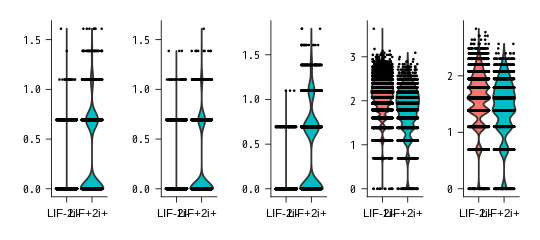

In [11]:
w = 4.5
h = 2

FONT.SIZE = 7
LABEL.FONT.SIZE = 7
LINE.W <- 0.2320667

set.theme = theme(
            strip.background = element_blank(),
            strip.text.x = element_blank(),
            strip.text.y = element_blank(),
            axis.text.x = element_text(colour = "black", angle = 0, hjust = 0.6, vjust = 0.7, size = LABEL.FONT.SIZE),
            axis.text.y = element_text(colour = "black", size = LABEL.FONT.SIZE),
            axis.title = element_blank(),
            axis.line = element_line(size = LINE.W, colour = "black"),
            axis.ticks = element_line(size = LINE.W, colour = "black"),
            panel.background = element_blank(),
            plot.background = element_blank(),
            plot.title = element_blank()
        ) 

options(repr.plot.width=w, repr.plot.height=h)

Idents(samplemerged) <- "sampletype"
gene.expression.vln = VlnPlot(samplemerged, 
        features = c("mm10-Nanog","mm10-Sox2","mm10-Klf2","mm10-Actb", "mm10-Gapdh"), ncol = 5, group.by = "sampletype")*set.theme

gene.expression.vln

ggsave(file = "vln.geneexpression.pdf", plot = gene.expression.vln, width = w, height = h)

## plot clones on to UMAP

In [12]:
barcodes.v1 = read.csv(file = '~/DryLab/Projects/scCloneSelect/scCSExp17.3-3/061622_Hiseq_dnBCcellBC_transcriptome/clonecellIDdict_forR_all.csv', header=TRUE)
barcodes.v2 = read.csv(file = '~/DryLab/Projects/scCloneSelect/scCSExp17.3-3/allsamplesjoint/jointcloneBCsearch/clonecellIDdict_forR_all.csv', header=TRUE)
barcodes <- merge(barcodes.v1, barcodes.v2, all=TRUE)

In [18]:
library("ggsci")
mypal2= pal_npg()(10)
mypal3 = pal_aaas()(10)

In [17]:
#define const for visualization
FONT.SIZE <- 9
LABEL.FONT.SIZE <- 9
LINE.W <- 0.232 # equivalent to 0.75pt in Keynote

w = 7
h = 5
#TOPX = 50

settheme <- theme_bw() + theme(strip.background = element_blank(),
                            strip.text.x = element_blank(),
                            strip.text.y = element_blank(),
                            axis.text.x = element_text(colour = "black", angle = 0, hjust = 1, vjust = 0.5, size = LABEL.FONT.SIZE),
                            axis.text.y = element_text(colour = "black", size = LABEL.FONT.SIZE),
                            axis.title = element_text(size = FONT.SIZE),
                            axis.line = element_line(size = LINE.W, colour = "black"),
                            axis.ticks = element_line(size = LINE.W, colour = "black") )

set.theme = theme(
            strip.background = element_blank(),
            strip.text.x = element_blank(),
            strip.text.y = element_blank(),
            axis.text.x = element_text(colour = "black", angle = 0, hjust = 0.6, vjust = 0.7, size = LABEL.FONT.SIZE),
            axis.text.y = element_text(colour = "black", size = LABEL.FONT.SIZE),
            axis.title = element_blank(),
            axis.line = element_line(size = LINE.W, colour = "black"),
            axis.ticks = element_line(size = LINE.W, colour = "black"),
            panel.background = element_blank(),
            plot.background = element_blank(),
            plot.title = element_blank())


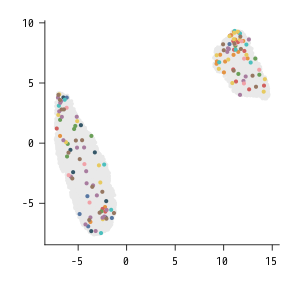

In [15]:
w = 2.5
h = 2.4
LINE.W <- 0.2320667 # equivalent to 0.75pt in Keynote

options(repr.plot.width = w, repr.plot.height = h)
p = DimPlot(samplemerged, reduction = "umap", 
        cells.highlight = list(
            barcodes$CGTCGGTTGTCCATCGGCTTTTTTTTTTCG, 
            barcodes$TGGGTGTTAACGTGTCTAACCCTTGATTGG, 
            barcodes$CCTCCAATACGCATTGGCGGTGCTGGTAGC, 
            barcodes$TTGACTGAGTCGTATGTCGACTTGTTATAG, 
            barcodes$TCAGGTGTCGTTTGTTAATTAACTCGATGG, 
            barcodes$TGGCTAGGTTTAACTAGCTGCACTAATCGG, 
            barcodes$AACGTTAGGTTTTGTTCTCGTTGGTTGCTG, 
            barcodes$GTGGATCAGGACTTGCATTTTTTTGTGGAT, 
            barcodes$GTGAGAGAGGGTAATTTTTGTATGCTTCGT, 
            barcodes$GGCGGTGTTTGGGTCTGCCGCGCGGTTTAA
        ), cols.highlight = c("#355768","#5878A3","#E49343","#D1605E","#4CC0BE",
                             "#6A9F58","#E7CA60","#A87C9F","#F1A2A8","#967762"),
            sizes.highlight = 0.5, cols = "#E9E9E9", order = TRUE, pt.size = 0.3481)+
  theme(legend.position = "none")+ set.theme

p


ggsave('cloneistribution_all.pdf',p,width = w, height = h, device='pdf', dpi=300)

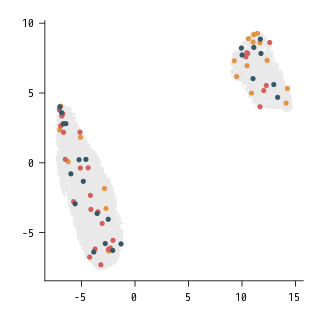

In [16]:
# selection of 3
mypal3 = pal_aaas()(3)
w = 2.7
h = 2.7
options(repr.plot.width = w, repr.plot.height = h)
p = DimPlot(samplemerged, reduction = "umap", 
        cells.highlight = list(
            barcodes$CGTCGGTTGTCCATCGGCTTTTTTTTTTCG, 
            barcodes$TGGGTGTTAACGTGTCTAACCCTTGATTGG, 
            barcodes$CCTCCAATACGCATTGGCGGTGCTGGTAGC 
        ), cols.highlight = c("#E49343","#D1605E","#355768"), sizes.highlight = 0.8, cols = "#E9E9E9", order = TRUE, pt.size = 0.03481)+
  theme(legend.position = "none")+ set.theme
p


ggsave('cloneistribution_partial.pdf',p,width = w, height = h, device='pdf',  dpi=300)

## gene expression of marker genes on UMAP

In [23]:
library(gghighlight)

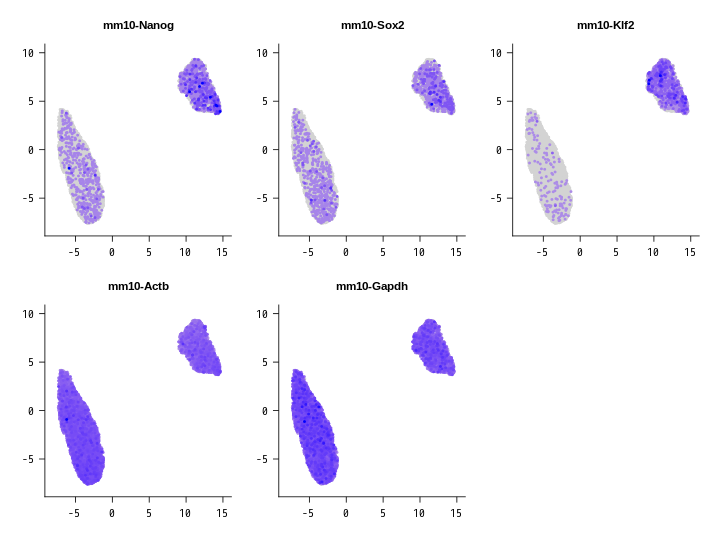

In [42]:
w = 6
h = 4.5
x = 0.5

options(repr.plot.width = w, repr.plot.height = h)
p = FeaturePlot(samplemerged, features = c("mm10-Nanog","mm10-Sox2","mm10-Klf2","mm10-Actb", "mm10-Gapdh"), order = TRUE, ncol = 3)*
 (set.theme + theme(legend.position = "none", 
                    plot.title = element_text(colour = "black", size = LABEL.FONT.SIZE)))


ggsave('geneexpression.pdf',p,width = w, height = h, device='pdf',units = "in")
ggsave('geneexpression.png',p,width = w, height = h, device='jpeg', dpi=500, units = "in")
p